In [179]:
import pandas as pd
from datetime import datetime
import seaborn
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [33]:
df_customer = pd.read_csv('./customers.csv', encoding='utf-8',  sep=',')
df_product = pd.read_csv('./products.csv', encoding='utf-8',  sep=',')
df_transaction = pd.read_csv('./transactions.csv', encoding='utf-8',  sep=',')

### Pour nettoyer : df.head(), df.dtypes, df.isna().any(), df.column.value_counts(), df.column.min(), .max(), df.column.value_counts, dropna (), drop_duplicates, df.column.tolist(), df.sort_values(by=[column])

In [165]:
df_customer

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [118]:
df_transaction.dtypes


id_prod                 object
date                    object
session_id              object
client_id               object
date_cleaned    datetime64[ns]
time                    object
dtype: object

In [19]:
df_customer.isna().any()

client_id    False
sex          False
birth        False
dtype: bool

In [20]:
df_product.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [39]:
df_product.categ.value_counts()

0    2309
1     739
2     239
Name: categ, dtype: int64

In [40]:
df_transaction.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [106]:
df_transaction["date_cleaned"] = df_transaction['date'].str[0:10]
df_transaction["time"] = df_transaction['date'].str[11:19]
df_transaction['date_cleaned'] = pd.to_datetime(df_transaction["date_cleaned"], format = '%Y-%m-%d' )
df_transaction['time'] = pd.to_datetime(df_transaction['time'], format= '%H:%M:%S').dt.time

id_prod                 object
date                    object
session_id              object
client_id               object
date_cleaned    datetime64[ns]
time                    object
dtype: object

### Clean des transactions dans le futur

In [59]:
df_transaction[df_transaction['date_cleaned'] >= '2022-01-01']
df_transaction = df_transaction.drop(df_transaction[df_transaction['date_cleaned'] >= '2022-01-01'].index)


,id_prod,date,session_id,client_id,date_cleaned,time


In [109]:
df_product[df_product['price'] <= 0]
df_product = df_product.drop(df_product[df_product['price'] <= 0].index)
df_product[df_product['price'] <= 0]


,id_prod,price,categ


clean : price négatifs, transaction date dans le futur, conversion dates, ... 

### "J'ai besoin de comprendre en détail les ventes de l'entreprise. Pour cela, j'aimerais obtenir des indicateurs précis de tendance centrale et de dispersion. Donne moi également une idée de la concentration, avec une courbe de Lorenz et un indice de Gini. Enfin, réalise plusieurs analyses bivariées."

In [124]:
df_all = pd.merge(df_product, df_transaction, left_on="id_prod", right_on="id_prod")
df_all = pd.merge(df_all, df_customer, left_on="client_id", right_on="client_id")
df_all

,id_prod,price,categ,date,session_id,client_id,date_cleaned,time,sex,birth
0,0_1421,19.99,0,2021-05-12 23:26:29.885083,s_33709,c_7954,2021-05-12,23:26:29,m,1973
1,0_1142,3.42,0,2021-03-24 00:54:59.507581,s_10590,c_7954,2021-03-24,00:54:59,m,1973
2,0_1446,8.09,0,2021-11-26 18:04:33.019608,s_125461,c_7954,2021-11-26,18:04:33,m,1973
3,0_2291,12.99,0,2021-05-29 18:25:02.094891,s_41299,c_7954,2021-05-29,18:25:02,m,1973
4,1_385,25.99,1,2021-06-01 20:41:40.157683,s_42731,c_7954,2021-06-01,20:41:40,m,1973
...,...,...,...,...,...,...,...,...,...,...
277841,2_98,149.74,2,2021-03-08 21:10:32.250919,s_3637,c_5967,2021-03-08,21:10:32,f,2003
277842,1_459,15.99,1,2021-06-07 19:19:46.676117,s_45465,c_2862,2021-06-07,19:19:46,m,1998
277843,1_389,24.99,1,2021-09-17 15:55:27.847407,s_91336,c_8354,2021-09-17,15:55:27,f,2002
277844,0_266,18.96,0,2021-05-04 01:46:45.375087,s_29571,c_8354,2021-05-04,01:46:45,f,2002


In [125]:
df_all["price"].mean()

17.062983019425904

In [126]:
df_all["price"].median()

13.59

In [128]:
df_all["price"].mode()

0    15.99
dtype: float64

In [129]:
df_all["price"].std()

17.81196180333668

In [135]:
df_all["price"].var()

317.26598328352486

In [136]:
df_all["price"].std() / df_all["price"].mean()

1.043894949848926

<AxesSubplot:>

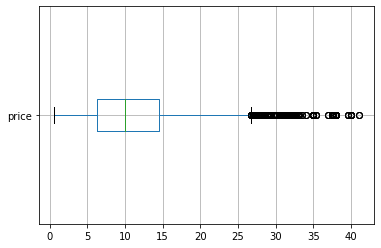

In [132]:
subset = df_all[df_all.categ == 0]
subset.boxplot(column="price", vert=False)

<AxesSubplot:>

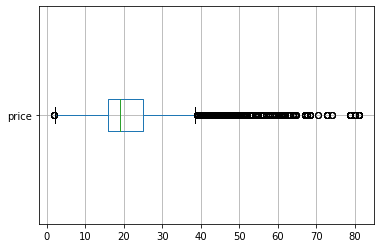

In [133]:
subset = df_all[df_all.categ == 1]
subset.boxplot(column="price", vert=False)


<AxesSubplot:>

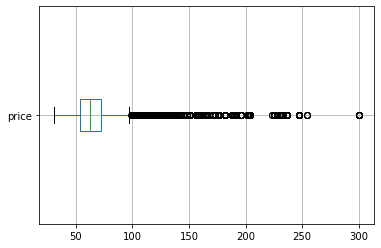

In [134]:
subset = df_all[df_all.categ == 2]
subset.boxplot(column="price", vert=False)


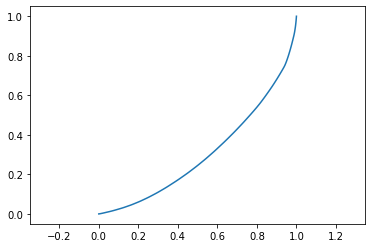

In [139]:
prices = df_all['price'].values
n = len(prices)
lorenz = np.cumsum(np.sort(prices)) / prices.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

In [140]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.39344791952790614

In [155]:
table = df_all[['sex', 'categ']].pivot_table(index='sex', columns='categ', aggfunc=len, margins=True,margins_name="Total")
table

categ,0,1,2,Total
sex,,,,
f,87356,43757,6761,137874
m,89427,42959,7586,139972
Total,176783,86716,14347,277846


In [153]:
df_all.groupby(['sex', 'categ']).agg({'price' : np.mean})

price
sex categ           
f   0      10.637968
    1      20.524385
    2      75.239456
m   0      10.658180
    1      20.482561
    2      75.372042

In [195]:
df_pc = df_all[['price', 'categ']]
df_pc.corr()

,price,categ
price,1.000000,0.676511
categ,0.676511,1.000000


<AxesSubplot:>

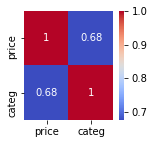

In [196]:
plt.figure(figsize=(2,2))
seaborn.heatmap(df_pc.corr(), annot=True, cmap='coolwarm' )

In [172]:
X = "sex" # qualitative
Y = "price" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(df_all[X],df_all[Y])

4.431393988127417e-05

#### Si η2Y/X=0 , cela signifie que les moyennes par classes sont toutes égales. Il n’y a donc pas a priori de relation entre les variables Y et X. Au contraire, si η2Y/X=1 , cela signifie que les moyennes par classes sont très différentes, chacune des classes étant constituée de valeurs identiques : il existe donc a priori une relation entre les variables Y et X.

In [173]:
X = "categ" # qualitative
Y = "price" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(df_all[X],df_all[Y])

0.6463432772963706

### A l'équipe marketing, il y a un chargé d'études qui a de bonnes bases de statistique. Il te demande de rajouter une étude des corrélations à ton analyse. Il aimerait surtout savoir :

s'il y a une corrélation entre le sexe des clients et les catégories de produits achetés.
s'il y a une corrélation entre l'âge des clients et le panier moyen (nombre d'articles et montant total), les catégories de produits achetés et la fréquence d'achat.

In [180]:
def contengency(dataframe, varia_1, varia_2):
    tab = pd.crosstab(dataframe[varia_1], dataframe[varia_2]) 
    table = sm.stats.Table(tab) 
    print(table.test_nominal_association())


In [181]:
contengency(df_all,"sex","categ")


df          2
pvalue      1.887379141862766e-14
statistic   63.20712444441746


In [182]:
df_all.sort_values(by=['session_id'])

,id_prod,price,categ,date,session_id,client_id,date_cleaned,time,sex,birth
252022,0_1259,11.99,0,2021-03-01 00:01:07.843138,s_1,c_329,2021-03-01,00:01:07,f,1967
72278,1_635,26.99,1,2021-03-01 00:10:33.163037,s_10,c_2218,2021-03-01,00:10:33,f,1970
158979,0_1030,13.73,0,2021-03-01 04:12:43.572994,s_100,c_3854,2021-03-01,04:12:43,f,1978
158983,0_1451,19.99,0,2021-03-01 04:43:58.025677,s_100,c_3854,2021-03-01,04:43:58,f,1978
91145,0_1438,9.31,0,2021-03-03 03:25:12.320225,s_1000,c_1014,2021-03-03,03:25:12,m,1989
...,...,...,...,...,...,...,...,...,...,...
208526,0_1362,11.30,0,2021-10-04 18:58:49.228317,s_99996,c_4900,2021-10-04,18:58:49,f,1974
66147,0_1197,6.99,0,2021-10-04 18:45:38.003516,s_99997,c_3521,2021-10-04,18:45:38,f,1979
69712,0_1572,8.61,0,2021-10-04 18:45:54.374885,s_99998,c_2795,2021-10-04,18:45:54,f,1978
69666,0_1411,8.99,0,2021-10-04 18:50:59.099942,s_99998,c_2795,2021-10-04,18:50:59,f,1978


In [192]:
table = df_all[['birth', 'categ']].pivot_table(index='birth', columns='categ', aggfunc=len, margins=True,margins_name="Total")
table

categ,0,1,2,Total
birth,,,,
1929,29.0,34.0,NaN,63
1930,37.0,56.0,NaN,93
1931,29.0,42.0,NaN,71
1932,66.0,68.0,1.0,135
1933,53.0,68.0,NaN,121
...,...,...,...,...
2001,390.0,589.0,677.0,1656
2002,427.0,658.0,746.0,1831
2003,410.0,640.0,729.0,1779


avoir un df groupé / session_id avec le birth et le panier moyen

In [223]:
df_panier_moyen = df_all.groupby(['session_id', 'birth'])['price'].agg('mean').reset_index()
df_panier_moyen

,session_id,birth,price
0,s_1,1967,11.990000
1,s_10,1970,26.990000
2,s_100,1978,16.860000
3,s_1000,1989,9.805000
4,s_10000,1989,13.830000
...,...,...,...
139861,s_99994,1983,9.640000
139862,s_99995,1960,19.840000
139863,s_99996,1974,14.067500
139864,s_99997,1979,6.990000


In [230]:
df_panier_moyen = df_panier_moyen[['birth', 'price']]
df_panier_moyen_group_by_birth = df_panier_moyen.groupby('birth')['price'].agg('mean').reset_index()
df_panier_moyen_group_by_birth

,birth,price
0,1929,14.017205
1,1930,17.321127
2,1931,17.772612
3,1932,15.517288
4,1933,15.408570
...,...,...
71,2000,44.635760
72,2001,48.846823
73,2002,48.403147
74,2003,47.294258


<AxesSubplot:xlabel='birth'>

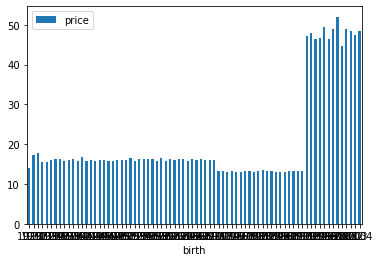

In [231]:
df_panier_moyen_group_by_birth.plot.bar(x='birth', y='price', rot=0)